In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

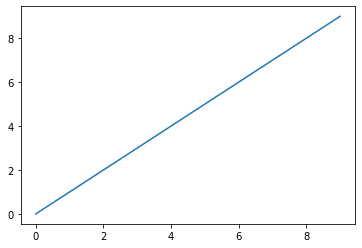

In [2]:
x = range(10)
y = range(10)
plt.plot(x, y)

In [2]:
m = 512
n = 512



In [3]:
print(n*m)

262144


In [27]:
eggsNum = 3
floorsNum = 100

In [35]:
def minThrow (eggsNum,floorsNum):
    minThrows = [] 
    jumps = [] 

    for egg in range(eggsNum+1):
        minThrows.append([])
        jumps.append([])
        for floor in range (floorsNum+1):
            if (egg == 0) and (floor == 0):
                minThrows[egg].append(0)
            elif floor == 0:
                minThrows[egg].append(0)
            elif egg == 1:
                minThrows[egg].append(floor)
            elif egg ==0:
                minThrows[egg].append(floorsNum+1)
            else:
                minimum = floorsNum+1 
                minIndex=-1
                for currentFloor in range(1, floor+1):
                    sol = 1+max(minThrows[egg][floor-currentFloor], minThrows[egg-1][currentFloor-1])
                    if sol <= minimum:
                        minimum = sol
                        minIndex = currentFloor
                minThrows[egg].append(minimum)
                jumps[egg].append(minIndex)
    return (minThrows[eggsNum][floorsNum])


In [36]:
def throwsDependingOnEggsNum (to, floorsNum):
    eggs = range(1,to)
    minimumThrows = []
    for egg in eggs:
        minimumThrows.append(minThrow(egg, floorsNum))
    plt.plot(eggs, minimumThrows)

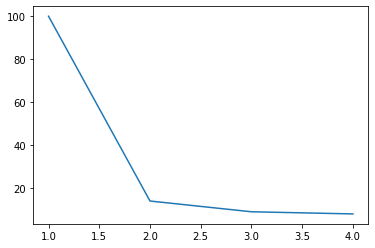

In [37]:
throwsDependingOnEggsNum (5, 100)

In [38]:
def throwsDependingOnFloorsNum (to, eggsNum):
    floors = range(1,to)
    minimumThrows = []
    for floor in floors:
        minimumThrows.append(minThrow(eggsNum, floor))
    plt.plot(floors, minimumThrows)

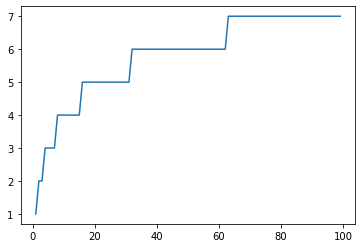

In [39]:
throwsDependingOnFloorsNum (100, 5)

In [19]:
minThrows = [] 
jumps = [] 

for egg in range(eggsNum+1):
    minThrows.append([])
    jumps.append([])
    for floor in range (floorsNum+1):
        if (egg == 0) and (floor == 0):
            minThrows[egg].append(0)
        elif floor == 0:
            minThrows[egg].append(0)
        elif egg == 1:
            minThrows[egg].append(floor)
        elif egg ==0:
            minThrows[egg].append(floorsNum+1)
        else:
            minimum = floorsNum+1 
            minIndex=-1
            for currentFloor in range(1, floor+1):
                sol = 1+max(minThrows[egg][floor-currentFloor], minThrows[egg-1][currentFloor-1])
                if sol <= minimum:
                    minimum = sol
                    minIndex = currentFloor
            minThrows[egg].append(minimum)
            jumps[egg].append(minIndex)


NameError: name 'eggsNum' is not defined

In [29]:
print(minThrows)

[[0, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100], [0, 1, 2, 2, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 